In this notebook:
- We will do hyperparameters optimization using (i) `Grid Search` and (ii) `Bayesian Optimization`

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.metrics import (r2_score,
                                mean_absolute_error,
                                mean_squared_error,
                                root_mean_squared_error,
                                max_error)
from sklearn.model_selection import GridSearchCV
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV
import warnings
warnings.filterwarnings('ignore')

## Load and split the dataset

In [2]:
X, y = make_regression(n_samples=2000, n_features=100, noise=5.0, bias=2.0, random_state=11)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## GridSearchCV

In [4]:
time_start = datetime.now()

params = {
    'alpha': [10, 20, 30],
    'l1_ratio': [0.001, 0.01, 0.99]
    }

gscv = GridSearchCV(estimator=linear_model.ElasticNet(),
                    param_grid=params,
                    cv=5
                   )
gscv.fit(X_train, y_train)
print("Best Estimator :", gscv.best_estimator_)
print("Best Score :", gscv.best_score_)

model_gscv = gscv.best_estimator_
model_gscv.fit(X_train, y_train)

y_pred_gscv = model_gscv.predict(X_test)
r2 = r2_score(y_test, y_pred_gscv)
rmse = root_mean_squared_error(y_test, y_pred_gscv)

print("R2 score =", r2)
print("Root mean squared error =", rmse)
print("Coefficient of determination =", model_gscv.score(X_test, y_test))
print("Mean absolute error =", mean_absolute_error(y_test, y_pred_gscv))
print("Mean squared error =", mean_squared_error(y_test, y_pred_gscv))
print("Maximum error =", max_error(y_test, y_pred_gscv))

time_stop = datetime.now()
delta = time_stop - time_start
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

Best Estimator : ElasticNet(alpha=10, l1_ratio=0.99)
Best Score : 0.9400660063151566
R2 score = 0.9448956886542345
Root mean squared error = 41.93574054391161
Coefficient of determination = 0.9448956886542345
Mean absolute error = 33.000427195026084
Mean squared error = 1758.6063349662725
Maximum error = 138.12111494825183
Time to compute:  0.161316 seconds


## BayesSearchCV

In [7]:
time_start = datetime.now()

params = {
    'alpha': Real(0.01, 1, prior='uniform'),
    'l1_ratio': Real(0.1, 1, prior='uniform'),
    }

bscv = BayesSearchCV(estimator=linear_model.ElasticNet(),
                     search_spaces=params,
                     cv=5,
                     n_iter=10,
                     return_train_score=False,
                     n_jobs=-1
                     )

_ = bscv.fit(X_train, y_train)
print("Best Estimator :", bscv.best_estimator_)
print("Best Score :", bscv.best_score_)

model_bscv = bscv.best_estimator_
model_bscv.fit(X_train, y_train)

y_pred_bscv = model_bscv.predict(X_test)
r2 = r2_score(y_test, y_pred_bscv)
rmse = root_mean_squared_error(y_test, y_pred_bscv)

print("R2 score =", r2)
print("Root mean squared error =", rmse)
print("Coefficient of determination =", model_bscv.score(X_test, y_test))
print("Mean absolute error =", mean_absolute_error(y_test, y_pred_bscv))
print("Mean squared error =", mean_squared_error(y_test, y_pred_bscv))
print("Maximum error =", max_error(y_test, y_pred_bscv))

time_stop = datetime.now()
delta = time_stop - time_start
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

Best Estimator : ElasticNet(alpha=0.17741684833248475, l1_ratio=0.9792680851387194)
Best Score : 0.9991657144506029
R2 score = 0.9992746238079527
Root mean squared error = 4.811418964270688
Coefficient of determination = 0.9992746238079527
Mean absolute error = 3.8171447343638465
Mean squared error = 23.149752449743623
Maximum error = 17.940423700294332
Time to compute:  0.695972 seconds


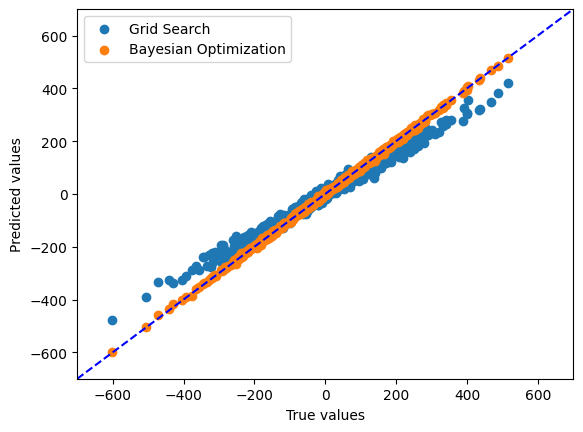

In [8]:
plt.scatter(y_test, y_pred_gscv, label="Grid Search")
plt.scatter(y_test, y_pred_bscv, label="Bayesian Optimization")
plt.xlabel("True values")
plt.ylabel("Predicted values")
i = 700
plt.plot([-i, i], [-i, i], "--", c="b")
plt.xlim(-i,i)
plt.ylim(-i,i)
plt.legend()
plt.show();